In [1]:
#importing necessary modules for statistical analysis and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('ggplot')

#matplotlib inline

C:\Users\Danny\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Violence And Health In Human Populations: An Analytical Exploration

_The Capstone Data Analysis Report for Thinkful's Data Science Prep Course_

July 18, 2017

By Danny Mulligan

## Introduction ##

As it stands today, humans have divided the world into 195 nation-states, each delineated from the other by geographical borders, histories of their peoples, governmental organization, and cultural norms. Although every human walking the earth today shares the same evolutionary history and thus, shares ~99.9% of their genes with any randomly selected stranger, a quick comparison of human behavior from one country to the next reveals staggering differences. To those of us interested in the alleviation of unnecessary human suffering, one of the most troubling differences is spelled out in blood: the differences in how frequently people kill each other and how often they end their own lives.

Before writing this report, I started by surveying all the freely available data and came across the vast array of data sets published by the United Nations. Out of all the variables they measured while sampling the nations of the world, two immediately stood out to me: homicide rate and suicide rate. As a professional in the field of mental health and someone aspiring to earn a Ph.D. in Clinical Psychology, I immediately noticed the following questions pop up in my mind:

What are the most violent countries, and what do they have in common? What causes one nation to be three times as violent as another? How can we use data science to identify likely causes of violence so that we can design preventative interventions and lower violence in countries across the globe?

Given the limited scope of this capstone report and my rudimentary knowledge of data science, I knew these questions were too vast and complex to answer. Instead, I decided to amass a data set of violence and population health indicators and ask three more specific and modest questions that could be answered (at least in part).

# Analytic Questions

_1. Do people living in more unequal countries kill each other more often?_

_2. Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?_

_3. Overall, which health indicators best account for elevated homicide rates?_ 

Typically, people pose questions about a phenomena of interest in natural language. But the problem with natural language is that terms are not usually well-defined and consequently, the question becomes difficult to answer properly. An ill-defined question leads to ill-defined answers. Considering this, I formulated the analytic questions above with some level of specificity. That being said, considerable ambiguity still exists. For example, when looking at question 1, how are we to know what makes one country more "unequal" than the next? Inequality can manifest in many different forms - income inequality, wealth inequality, political inequality, racial inequality, and gender inequality, to name just a few. 

In order to solve this problem of ambiguity, I decided to formulate multiple alternative hypotheses for each question. Although I am most interested in understanding the relationship between some hypothetical measure of "total inequality" and homicide rate, I do not have access to such a measure. Similarly, the data set does not contain any total measure of child maltreatment. As a result, I decided to formulate alternative hypotheses using multiple available measures, the amalgamation of which might best approximate a hypothetical "total" measure. By doing this, I am essentially formulating a set of very specific sub-questions that can be answered definitively with statistical tests. When the sub-questions have been answered by the statistical tests, I can then reflect upon the answers to all the sub-questions and discuss how they together contribute to an answer to the analytic question. Therefore, I expect to have 7 sub-questions answered definitively with hypothesis tests and 3 broader analytic questions answered partially. That is why I deemed this report "an analytical exploration." The partiality of the answers to the analytical questions will be addressed in the "Further Research" section at the end with suggestions for additional analyses that might provide more definitive answers.

#### Alternative Hypotheses to Test

To answer the first two questions, I will conduct hypothesis tests. Each test will determine the difference in means between two samples and the probability that this difference is statistically significant. In each case, I will start by assuming the same Null Hypothesis, namely that I cannot confidently assert there is a significant difference between the two samples. The Alternative Hypotheses are as follows: 

_Tests for Question 1_
- _H1:_ Countries where the top 20% highest earning households have a higher share of total income will have significantly higher homicide rates.

- _H2:_ Countries where the bottom 40% lowest earning households have a lower share of total income will have significantly higher homicide rates.

- _H3:_ Countries with a bigger gender gap in literacy rate will have significantly higher homicide rates. 

_Tests for Question 2_
- _H4:_ Countries with a higher proportion of poor children in inadequate care will have significantly higher homicide rates.

- _H5:_ Countries with a higher proportion of poor children in inadequate care will have significantly higher suicide rates.

- _H6:_ Countries with higher rates of violent child discipline will have significantly higher homicide rates.

- _H7:_ Countries with higher rates of violent child discipline will have significantly higher suicide rates.

Question 3 cannot be answered with a hypothesis test. In fact, I know that I cannot answer it definitively with my current data analysis tool set. Therefore, a preliminary analysis using the tools I have available will lay the groundwork, and I will propose ideas for further research.

In [2]:
#importing data set into data frame
df = pd.read_csv('Cleaned UN Deaths and Risks Data Set.csv')

# Part I: Describing the Data

The data set imported for this analysis is a conglomeration of multiple data sets published by two reputable international organizations: the United Nations and the World Health Organization (WHO). UNdata.com, created by the statistical branch of the Department of Economic and Social Affairs, provided most of the data. The Global Health Obseratory, run by WHO, collects thousands of indicators of global health and provided additional data for this analysis.

The data set consists of 16 population health indicators (columns) for 54 countries (rows). I chose this data set because of my urge to understand the complex and tragic phenomena of human violence. Thus, I started the data collection by finding two particularly important health indicators: homicide rate and suicide rate. The most complete and recent data available came from the World Health Organization for the year 2015. The remaining 14 health indicators were selected by me based upon their hypothesized relevance to the variance in human violence from country to country.

Unfortunately, because the UN and WHO collect these data from a variety of sources across time, the 16 health indicators were not measured in the same year. Implications of this fact will be discussed later. For now, it will suffice to summarize the 16 health indicators. Every health indicator takes the form of a quantitative variable that varies continuously. In fact, every health indicator turned out to be a percentage. I will now identify each health indicator by the variable name in the data set and provide a short description of its meaning.

__homicide rate__ - estimated homicides per 100,000 population members (2015)

__suicide rate__ - age-standardized suicides per 100,000 population members (2015)

__recent heavy drinking for male drinkers__ - percent of male heavy drinkers with at least one heavy drinking episode in the last 30 days (2010)

__recent heavy drinking for males__ - percent of males with at least one heavy drinking episode in the last 30 days (2010)

__urban pop__ - percent of population living in urban areas (2010)

__early ed attn__ - percent of children attending early childhood education (2005 - 2011)

__child discipline__ - percent of parents who report that they engage in violent child disciplinary practices (2005 - 2011)

__adult lit rate__ - percent of adults who are literate (2007 - 2011)

__edu spend__ - education expenditure as a percent of total central government expenditures (2007 - 2011)

__f to m lit ratio__ - ratio of adult female literacy rate to adult male literacy rate (2007 - 2011)

__health spend__ - health expenditure as a percent of total central government expenditures (2007 - 2011)

__children in bad care__ - percent of children left in inadequate care (2005 - 2011)

__poorest children in bad care__ - percent of the poorest 20% of children left in inadequate care (2005 - 2011)

__pre 18 births__ - percent of females, age 20 to 24, who gave birth before age 18 (2007 - 2011)

__lowest 40 income share__ - the share of total income taken in by the poorest 40% of the population (2005 - 2011)

__highest 20 income share__ - the share of total income taken in by the richest 20% of the population (2005 - 2011)


In [3]:
# Let's create a table that uses descriptive statistics to summarize the data set
df.describe()

,homicide_rate,suicide_rate,recent_heavy_drinking_for_male_drinkers,recent_heavy_drinking_for_males,urban_pop,early_ed_attn,child_discipline,adult_lit_rate,edu_spend,f_to_m_lit_ratio,health_spend,children_in_bad_care,poorest_children_in_bad_care,pre_18_births,lowest_40_income_share,highest_20_income_share
count,53.000000,54.000000,53.000000,53.000000,52.000000,54.000000,37.000000,47.000000,37.000000,47.000000,49.000000,39.000000,35.000000,42.000000,43.000000,43.000000
mean,8.754717,11.633333,17.900000,9.955849,43.736538,28.962963,77.567568,76.808511,4.594595,83.957447,3.265306,18.743590,22.914286,18.690476,17.930233,45.209302
std,7.735820,6.715176,16.913195,11.480635,17.495972,25.123816,14.072314,21.852906,1.657633,17.253805,1.729349,16.387926,17.790234,14.470303,3.232243,5.667611
min,1.300000,1.400000,0.400000,0.090000,9.100000,1.000000,38.000000,29.000000,1.000000,47.000000,0.000000,1.000000,2.000000,2.000000,10.000000,36.000000
25%,4.000000,7.125000,3.900000,0.500000,31.625000,8.500000,71.000000,57.500000,4.000000,66.500000,2.000000,7.500000,10.000000,4.500000,16.000000,41.500000
50%,6.900000,10.650000,13.700000,6.800000,41.050000,22.000000,82.000000,84.000000,5.000000,90.000000,3.000000,13.000000,17.000000,16.500000,18.000000,45.000000
75%,10.200000,14.875000,22.700000,13.200000,55.825000,39.750000,89.000000,97.500000,5.000000,99.000000,4.000000,29.000000,33.000000,27.500000,20.000000,47.500000
max,37.200000,30.600000,70.800000,47.800000,87.200000,98.000000,95.000000,100.000000,8.000000,112.000000,8.000000,61.000000,69.000000,55.000000,24.000000,61.000000


Since the 'homicide rate' variable is of prime interest and an integral part of questions 1 and 2, I will create a bar graph to easily visualize the differences in 'homicide rate' from country to country. From the table above, we know that there are 53 countries in this sample. The difference between the max and min is astounding (almost 37 fold!), so we should expect to see at least two bars that are very far apart.

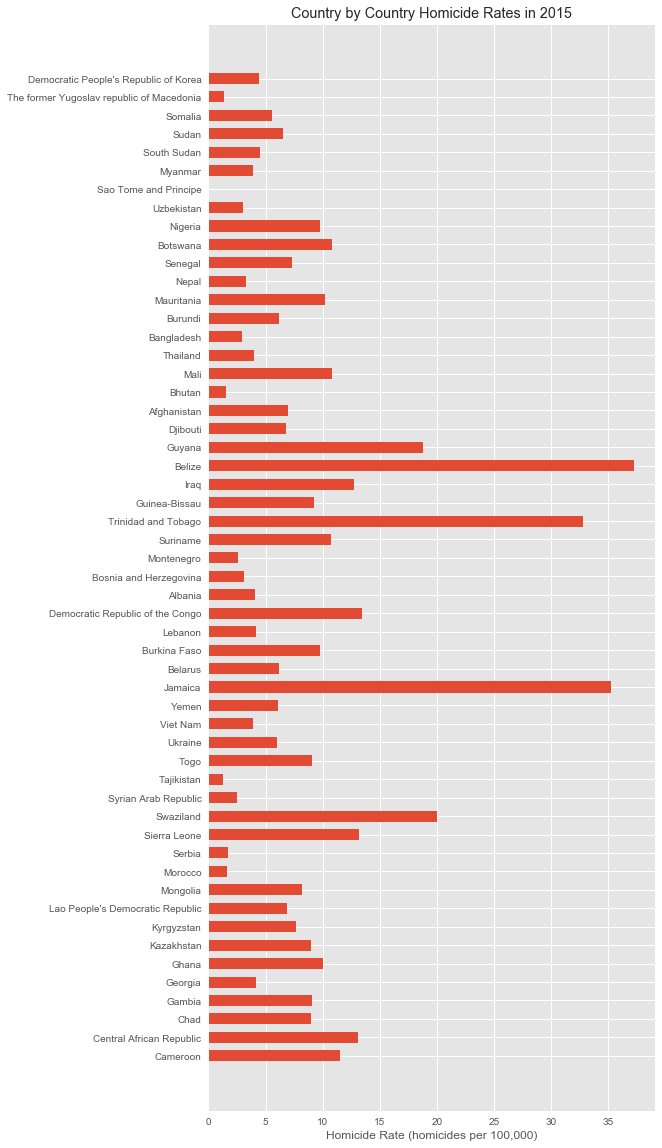

In [4]:
# displays a horizontal bar chart
plt.figure(figsize=(8, 20))
plt.barh(np.arange(len(df.loc[:,'country'])), df.loc[:,'homicide_rate'], height=.6)
plt.yticks(np.arange(len(df.loc[:,'country'])), df.loc[:,'country'])
plt.xlabel('Homicide Rate (homicides per 100,000)')
plt.title('Country by Country Homicide Rates in 2015')
plt.show()

When looking at this graph, the first thing that pops out is the presence of three outliers. Trinidad and Tobago, Jamaica, and Belize really suffered from high homicide rates in 2015 relative to the other 50 countries. I also notice that Sao Tome and Principe (a country I didn't even know existed!) is missing data. This can be addressed later by removing null values. Overall, I see quite a lot of variation in homicide rate that I would like to explain.

To begin this process of explanation, I will calculate Spearman's Rank Correlations (or Spearman's Rho) for all factors in the data set and then graph the coefficients onto a "heat map." This will produce a matrix where each box contains the correlation coefficient, a number ranging from -1 to 1. Each box will also be colored to indicate the "heat" of this correlation. The stronger the positive correlation (and thus, the closer the coefficient is to 1), the more fiery the red coloring. The stronger the negative correlation (and thus, the closer the coefficient is to -1), the more icey blue the coloring. A coefficient of 0 is represented by white, meaning that the weaker correlations will be contained in whiter boxes. 

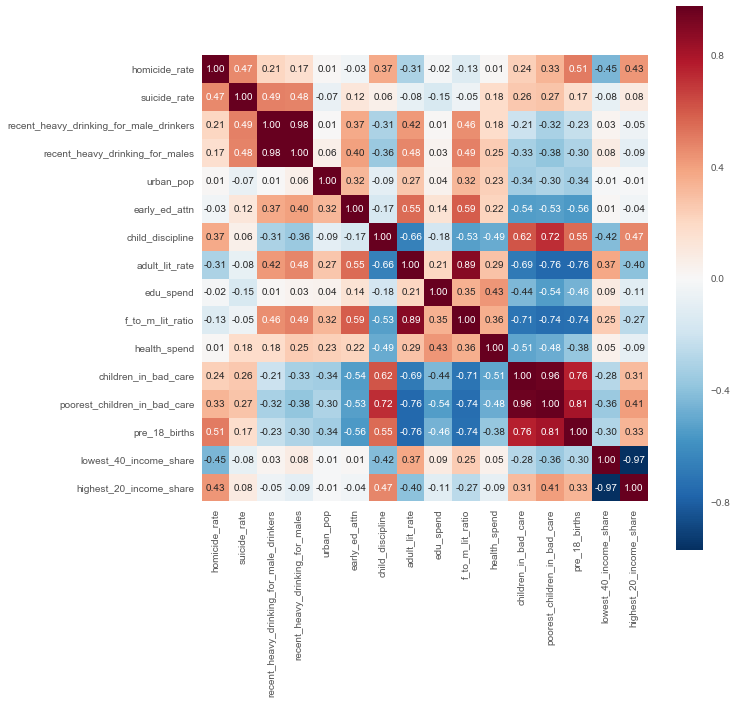

In [5]:
# displays a "heat map"
corrmat = df.corr(method='spearman')
plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

While this figure could be interpreted at great length, our present purposes should bring our eyes to the 'homicide rate' and 'suicide rate' columns, for it is these measures that we made predictions about with our alternative hypotheses. It is now clear that measures of inequality and child maltreatment do in fact correlate with homicide rate to a moderate degree. For example, 'lowest_40_income_share' is one of the "correlates" of 'homicide_rate.' What does that mean? 

In part, it means that countries where the lowest 40% of income earners have a lower share of the total income tend to have higher homicide rates. As the poorest 40% of the population has less and less income relative to the rest of their fellow citizens, the homicide rate gets bigger and bigger. This correlation, and others like it, indicate that the alternative hypotheses might actually be better than the null hypotheses. This is exciting! But let's not jump to conclusions just yet. There's more statistical groundwork to be laid.

# Part II: Analyzing the Data

## 1. Do people living in more unequal countries kill each other more often?

_Part A: Checking Distributions_

Before we can conduct t-tests and draw conclusions from them, we should first check if the sample approximates a normal distribution. Let's look at a histrogram for homicide rate.

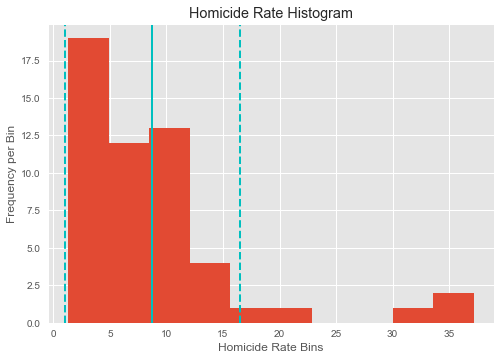

In [6]:
# removes null values and plots a 10-bin histogram
hom = df[df['homicide_rate'].isnull()==False]
plt.hist(hom['homicide_rate'])
plt.title("Homicide Rate Histogram")
plt.ylabel("Frequency per Bin")
plt.xlabel("Homicide Rate Bins")
plt.axvline(hom['homicide_rate'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(hom['homicide_rate'].mean() + hom['homicide_rate'].std(), color='c', linestyle='dashed', linewidth=2)
plt.axvline(hom['homicide_rate'].mean() - hom['homicide_rate'].std(), color='c', linestyle='dashed', linewidth=2)
plt.show()

This sample of national homicide rates appears to be somewhat close to a normal distribution, but the prevalence of the lower and upper outliers concerns me. Fortunately, the Central Limit Theorem proves that normal distributions can still be used to analyze samples of populations of an unknown distribution, as long as the sample size is large enough. With a sample size of n > 50, it is most likely safe to move forward with statistical methods that work for normally distributed populations. But to be cautious, let's create a series of probability plots (very similar to QQ plots) for the 4 variables relevant to question 1. The straighter the lines, the more safely we can assume normality.

C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Danny\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


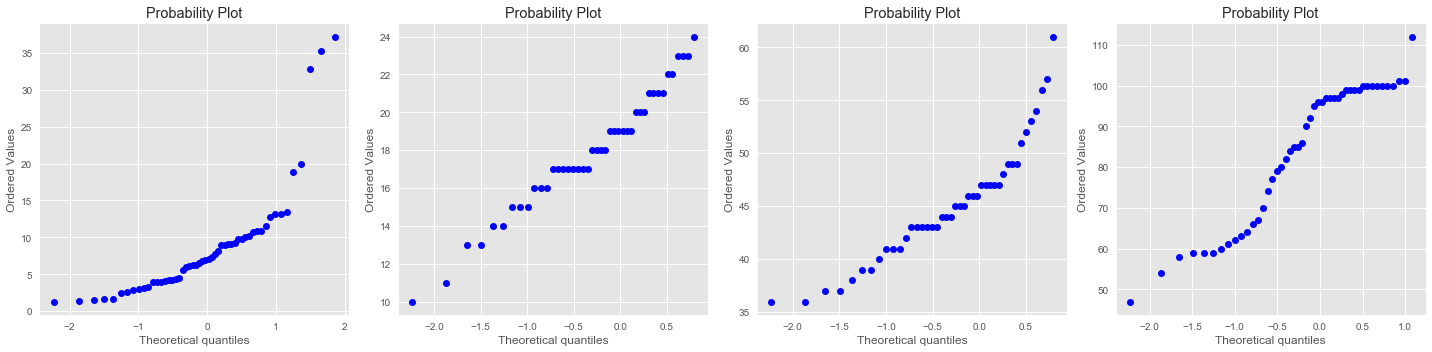

In [7]:
# creates 4 subplots for 4 probability plots from the SciPy module
plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
scipy.stats.probplot(df.loc[:,'homicide_rate'], plot=plt, fit=True)
plt.subplot(1, 4, 2)
scipy.stats.probplot(df.loc[:,'lowest_40_income_share'], plot=plt, fit=True)
plt.subplot(1, 4, 3)
scipy.stats.probplot(df.loc[:,'highest_20_income_share'], plot=plt, fit=True)
plt.subplot(1, 4, 4)
scipy.stats.probplot(df.loc[:,'f_to_m_lit_ratio'], plot=plt, fit=True)
plt.tight_layout()
plt.show()

The first probability plot is for 'homicide rate.' As we can see, the line is quite straight until the last 5 points, especially the last 3 points. These would be the outliers identified earlier - Trinidad and Tobago, Jamaica, and Belize. We could remove these outliers from the analysis to get a straighter line and thus, a more normal distribution. But this would be dishonest, an act of willful blindness. Instead, we will move forward with the full data set because the sample size (n = 50) is large enough to warrant the use of statistical tests associated with normal distributions. As will be discussed later, further research could investigate where extraordinary circumstances such as massive social and political upheaval could account for the outliers. 

As for the other three probability plots, each has an abnormal, non-linear feature: quantized steps, a curvilinear trend upwards, and a double curve that resembles a snake or a sine wave. These features cast considerable doubt on the assumption that the samples are normally distributed. That being said, each plot could also be closely approximated by a best fit line that splits the difference. In light of this ambiguity, we will proceed with caution and supplement t-tests with other similar tests that do not rely so heavily on the assumption of sufficient normality of the sample.

_Part B: Creating Sample Groups to Compare_

In order to test the hypotheses for question 1, we need to split the samples into subgroups. I will start with 'highest_20_income_share', which is one way to measure income inequality. To test whether people in countries with higher income inequality kill each other more often, we will create two subgroups: countries with below average income inequality and countries with above average income inequality. Then we will compare the mean homicide rates for the two subgroups. The graphs below visualize these two procedures nicely.

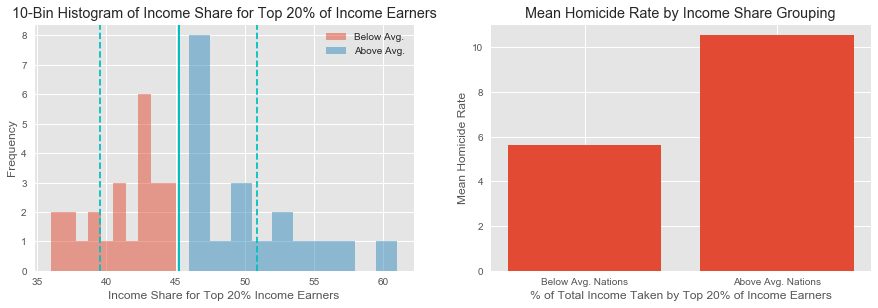

In [8]:
# creates two new data frames for the two subgroups
low_ineq = df[df['highest_20_income_share'] < df['highest_20_income_share'].mean()]
high_ineq = df[df['highest_20_income_share'] >= df['highest_20_income_share'].mean()]

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
plt.hist(low_ineq['highest_20_income_share'], alpha=0.5, label='Below Avg.') 
plt.hist(high_ineq['highest_20_income_share'], alpha=0.5, label='Above Avg.') 
plt.legend(loc='upper right') 
plt.axvline(df['highest_20_income_share'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(df['highest_20_income_share'].mean() + df['highest_20_income_share'].std(), color='c', linestyle='dashed')
plt.axvline(df['highest_20_income_share'].mean() - df['highest_20_income_share'].std(), color='c', linestyle='dashed')
plt.title("10-Bin Histogram of Income Share for Top 20% of Income Earners")
plt.ylabel("Frequency")
plt.xlabel("Income Share for Top 20% Income Earners")

plt.subplot(2,2,2)
plt.bar([1,2], [low_ineq['homicide_rate'].mean(), high_ineq['homicide_rate'].mean()])
plt.title("Mean Homicide Rate by Income Share Grouping")
plt.ylabel("Mean Homicide Rate")
plt.xticks([1,2], ["Below Avg. Nations","Above Avg. Nations"])
plt.xlabel("% of Total Income Taken by Top 20% of Income Earners")
plt.show()

The figure on the right clearly shows that the countries with an above average level of income inequality (with respect to this single measure) have a homicide rate that is almost twice as high! This shows that the alternative hypothesis is on the right track. But should we reject the null hypothesis? No, not so fast. We need to perform statistical tests that determine if the difference in group means is _significant._ These tests will take into account the size of the difference, the subsample sizes, and the variance of the subsamples. 

_Part C: Hypothesis Testing_

It's time to perform the first hypothesis test. The graphs above already indicate that the t-statistic will be fairly large. So the test result to pay attention to will be the p-value. In order to reject the Null Hypothesis, we will need to see p < 0.05. This means that we will only tolerate a less than 5% chance that the difference in the means is due to randomness. In other words, we will only accept the Alternative Hypothesis if we can say with at least 95% confidence that the difference in subgroup means is real and not due to chance. Although 95% is a very common confidence interval, it should be stated that different research communities operate with different standards. Many rigorous scientific researchers have a default confidence interval setting of 99%. The bottom line is that the confidence interval is set by the researcher and for this exploratory analysis, I am quite content with a 95% confidence interval.

Now that we know what to look for, let's see what the numbers tell us...

In [9]:
high_ineq2 = high_ineq[high_ineq['homicide_rate'].notnull()]
low_ineq2 = low_ineq[low_ineq['homicide_rate'].notnull()]
from scipy.stats import ttest_ind
print(scipy.stats.ttest_ind(high_ineq2['homicide_rate'], low_ineq['homicide_rate'], equal_var=False))

Ttest_indResult(statistic=2.5602117077951059, pvalue=0.018087384217050421)


The p-value is less than 0.05! This means that we can reject the Null Hypothesis and embrace the Alternative Hypothesis (H1), but only if the assumption of sufficient normality is sound. Because the probability plot for 'highest_20_income_share' was not obviously linear, let's err on the safe side and confirm this result with another statistical test. We will use the Mann-Whitney U test, which also tests if the difference between two independent samples is significant. This test, however, does not assume normality. If the Mann-Whitney U test spits out a p-value less than 0.05, then we can breathe a sigh of relief and confidently reject the Null Hypothesis without a background worry about the validity of the assumption of normality.  

In [10]:
print(scipy.stats.mannwhitneyu(high_ineq2['homicide_rate'], low_ineq['homicide_rate']))

MannwhitneyuResult(statistic=105.0, pvalue=0.002485009255698794)


The p-value is even smaller! Now we can confidently reject the Null Hypothesis and embrace the Alternative Hypothesis (H1)! Before moving on with the remaining tests, I will define a custom hypothesis test function that uses the methodology demonstrated here so that needless code repetition can be avoided.

In [11]:
def hypothesis_test(subgroup_var, q1, q2, indicator, p):
    # subgroup_var is the name for the data frame column of interest
    # q1 and q2 are quantiles. q1 is the upper bound for the lower subgroup and q2 is the lower bound for the higher subgroup
    # indicator is the name of the data frame column that will be the dependent variable 
    # p is the desired significance value for the hypothesis test
    
    lower = df[df[subgroup_var] < df[subgroup_var].quantile(q1)]
    higher = df[df[subgroup_var] > df[subgroup_var].quantile(q2)]
    # removes null values
    lower2 = lower[lower[indicator].notnull()]
    higher2 = higher[higher[indicator].notnull()]
    # prints results
    print("Subgroup 1: n = {}, mean = {} for ".format(len(lower), lower[subgroup_var].mean()) + str(subgroup_var))
    print("Subgroup 2: n = {}, mean = {} for ".format(len(higher), higher[subgroup_var].mean()) + str(subgroup_var))
    print("\nHypothesis Test Results:")
    print("\nt-statistic = " + str(scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).statistic) 
        + ", p-value = " + str(scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).pvalue))
    print("U-statistic = " + str(scipy.stats.mannwhitneyu(higher2[indicator], lower2[indicator]).statistic) 
        + ", p-value = " + str(scipy.stats.mannwhitneyu(higher2[indicator], lower2[indicator]).pvalue))
    if (scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).pvalue < p 
        and scipy.stats.mannwhitneyu(higher2[indicator], lower2[indicator]).pvalue < p):
            print("\nThe Null Hypothesis should be rejected!")
            print("We can confidently assert that the subgroups are significantly different with respect to " + str(indicator))
    elif (scipy.stats.ttest_ind(higher2[indicator], lower2[indicator], equal_var=False).pvalue > p 
          and scipy.stats.mannwhitneyu(higher2[indicator], lower2[indicator]).pvalue > p):
            print("\nThe Null Hypothesis should NOT be rejected.")
            print("We can't confidently assert that the subgroups are significantly different with respect to " + str(indicator))
    else: 
        print("\nSIGNIFICANCE RESULT MISMATCH")
        print("The t-test and u-test do not agree. Human interpretation needed.")

In [12]:
hypothesis_test('lowest_40_income_share', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 20, mean = 15.2 for lowest_40_income_share
Subgroup 2: n = 19, mean = 20.789473684210527 for lowest_40_income_share

Hypothesis Test Results:

t-statistic = -2.25886970052, p-value = 0.0331197521255
U-statistic = 104.0, p-value = 0.0132336193255

The Null Hypothesis should be rejected!
We can confidently assert that the subgroups are significantly different with respect to homicide_rate


In [13]:
hypothesis_test('f_to_m_lit_ratio', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 23, mean = 68.73913043478261 for f_to_m_lit_ratio
Subgroup 2: n = 23, mean = 98.91304347826087 for f_to_m_lit_ratio

Hypothesis Test Results:

t-statistic = -0.0168817702427, p-value = 0.986645347482
U-statistic = 190.5, p-value = 0.0531463151474

The Null Hypothesis should NOT be rejected.
We can't confidently assert that the subgroups are significantly different with respect to homicide_rate


Since splitting by the .5 quantile did not produce a significant difference in the dependent variable, let's use the built-in flexibility of the hypothesis test function to try a more drastic split. By splitting the countries into those lower than the .25 quantile and higher than the .75 quantile, we will see an even greater difference in the inequality of literacy rate between the groups. If gender inequality as manifested in the female to male literacy rate ratio does account for the variance in homicide rates, we would expect to see greater gender inequality associate with greater differences in homicide rate. Let's see what happens...

In [14]:
hypothesis_test('f_to_m_lit_ratio', .25, .75, 'homicide_rate',.05)

Subgroup 1: n = 12, mean = 59.333333333333336 for f_to_m_lit_ratio
Subgroup 2: n = 10, mean = 101.4 for f_to_m_lit_ratio

Hypothesis Test Results:

t-statistic = 0.304068767002, p-value = 0.7664813862
U-statistic = 47.0, p-value = 0.204773411255

The Null Hypothesis should NOT be rejected.
We can't confidently assert that the subgroups are significantly different with respect to homicide_rate


This test makes it clear that vast differences in gender inequality as manifested in the female to male literacy rate ratio do not account for differences in homicide rates. It should also be noted that the sample sizes were regrettably small, which makes significance harder to obtain.

Overall, these hypothesis tests have shown that greater inequality in the form of income inequality does correspond with higher homicide rates, while greater inequality in the form of a gender gap in literacy rate does not correspond with higher homicide rates. Before moving on to the next question, let's use a pie chart to visualize the magnitude of this finding: 

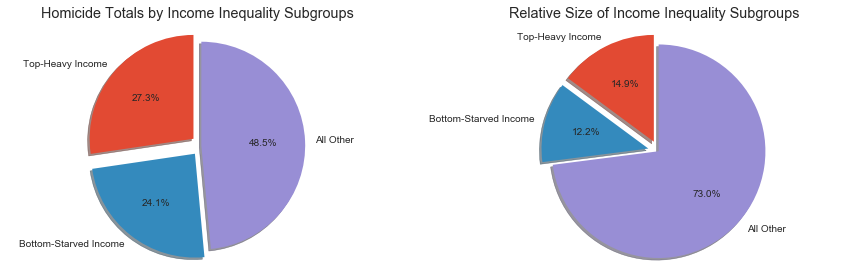

In [15]:
# creates two data frames for extreme values of the two health indicators of interest
top_heavy = df[df['highest_20_income_share'] > df['highest_20_income_share'].quantile(.75)]
bottom_starved = df[df['lowest_40_income_share'] < df['lowest_40_income_share'].quantile(.25)]
labels = 'Top-Heavy Income', 'Bottom-Starved Income', 'All Other'

# sums up the homcide rates for all countries in each of the two extreme groups as well as all countires not in either group
homicides = [top_heavy['homicide_rate'].sum(), bottom_starved['homicide_rate'].sum(), 
            df['homicide_rate'].sum() - top_heavy['homicide_rate'].sum() - bottom_starved['homicide_rate'].sum()]
explode = (0.1, 0.1, 0)

# creates two side-by-side pie charts
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title("Homicide Totals by Income Inequality Subgroups")
plt.pie(homicides, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal') 
plt.subplot(2, 2, 2)
plt.title("Relative Size of Income Inequality Subgroups")
plt.pie([len(top_heavy['homicide_rate']),len(bottom_starved['homicide_rate']),len(df['homicide_rate'])], 
        explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

"Top-Heavy Income" means the group of countries where the proportion of total population income that the top 20% income earners take home is greater than 75% of the countries in the total sample. In other words, these are the countries where the richest people bring home the bacon and the rest bring home bread. "Bottom-Starved Income" means the group of countries where the proportion of total population income that the bottom 40% income earners take home is less than 25% of the countries in the total sample. In other words, these are the countries where the poor and working class are the most starved of income, relative to their fellow citizens. 

As you can see from the pie chart on the left, these two groups of countries account for more than half of homicides in the data set, _even though the groups only contain 27% of the countries, as shown by the pie chart on the right!_

## 2. Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?

_Part A: Checking Distributions_

Before I conduct the hypothesis tests for this question, I need to check if the samples come from a normal distribution. I will plot histograms to get a good visual. Instead of using the probability plots like before, I will use the SciPy normal test function (based on D’Agostino and Pearson’s omnibus test of normality) to verify my conclusion.

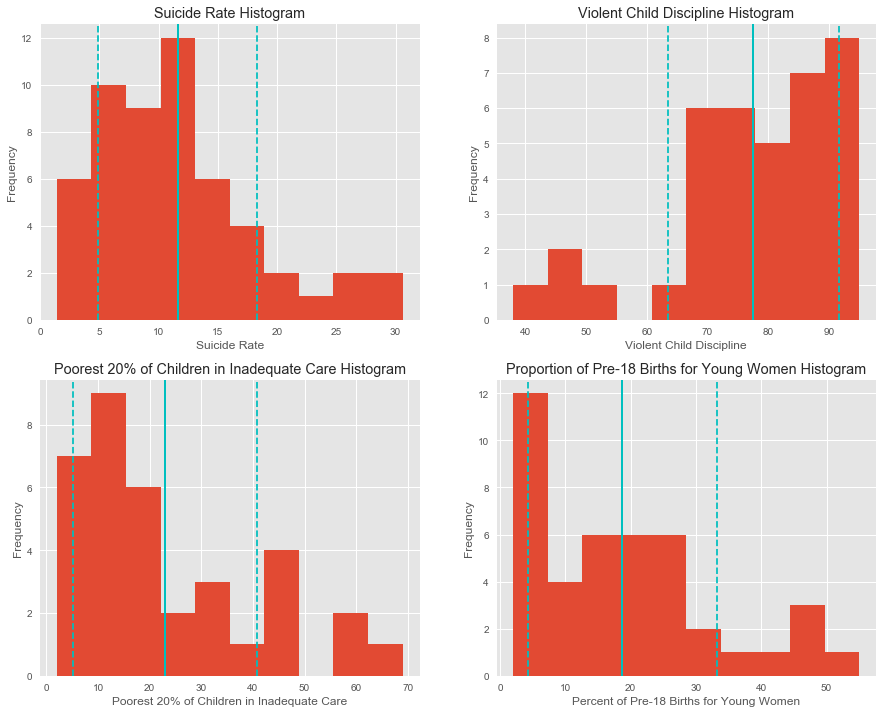

In [16]:
# removes null values
su_r = df[df['suicide_rate'].isnull()==False]
cd = df[df['child_discipline'].isnull()==False]
pc_bc = df[df['poorest_children_in_bad_care'].isnull()==False]
p18b = df[df['pre_18_births'].isnull()==False]

# creates 4 subplots for 4 histograms with similar annotations
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.title("Suicide Rate Histogram")
plt.ylabel("Frequency")
plt.xlabel("Suicide Rate")
plt.hist(su_r['suicide_rate'])
plt.axvline(su_r['suicide_rate'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(su_r['suicide_rate'].mean() + su_r['suicide_rate'].std(), color='c', linestyle='dashed')
plt.axvline(su_r['suicide_rate'].mean() - su_r['suicide_rate'].std(), color='c', linestyle='dashed')
plt.subplot(2, 2, 2)

plt.title("Violent Child Discipline Histogram")
plt.ylabel("Frequency")
plt.xlabel("Violent Child Discipline")
plt.hist(cd['child_discipline'])
plt.axvline(cd['child_discipline'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(cd['child_discipline'].mean() + cd['child_discipline'].std(), color='c', linestyle='dashed')
plt.axvline(cd['child_discipline'].mean() - cd['child_discipline'].std(), color='c', linestyle='dashed')

plt.subplot(2, 2, 3)
plt.title("Poorest 20% of Children in Inadequate Care Histogram")
plt.ylabel("Frequency")
plt.xlabel("Poorest 20% of Children in Inadequate Care")
plt.hist(pc_bc['poorest_children_in_bad_care'])
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean() + pc_bc['poorest_children_in_bad_care'].std(), color='c', linestyle='dashed')
plt.axvline(pc_bc['poorest_children_in_bad_care'].mean() - pc_bc['poorest_children_in_bad_care'].std(), color='c', linestyle='dashed')

plt.subplot(2, 2, 4)
plt.title("Proportion of Pre-18 Births for Young Women Histogram")
plt.ylabel("Frequency")
plt.xlabel("Percent of Pre-18 Births for Young Women")
plt.hist(p18b['pre_18_births'])
plt.axvline(p18b['pre_18_births'].mean(), color='c', linestyle='solid', linewidth=2)
plt.axvline(p18b['pre_18_births'].mean() + p18b['pre_18_births'].std(), color='c', linestyle='dashed')
plt.axvline(p18b['pre_18_births'].mean() - p18b['pre_18_births'].std(), color='c', linestyle='dashed')
plt.show()

All four of these samples have significant outliers and large frequency clusters that are far from the mean. Thus, it is unclear whether the samples are sufficiently normal. Let's use the aforementioned normal test and review the results below:

In [17]:
print("Does 'suicide_rate' come from a non-normal distribution? pvalue = " 
      + str(scipy.stats.mstats.normaltest(su_r['suicide_rate']).pvalue))
print("Does 'child_discipline' come from a non-normal distribution? pvalue = " 
      + str(scipy.stats.mstats.normaltest(cd['child_discipline']).pvalue))
print("Does 'poorest_children_in_bad_care' come from a non-normal distribution? pvalue = "
      + str(scipy.stats.mstats.normaltest(pc_bc['poorest_children_in_bad_care']).pvalue))
print("Does 'pre_18_births' come from a non-normal distribution? pvalue = "
      + str(scipy.stats.mstats.normaltest(p18b['pre_18_births']).pvalue))

Does 'suicide_rate' come from a non-normal distribution? pvalue = 0.00642195076403
Does 'child_discipline' come from a non-normal distribution? pvalue = 0.0150629247458
Does 'poorest_children_in_bad_care' come from a non-normal distribution? pvalue = 0.0611457635611
Does 'pre_18_births' come from a non-normal distribution? pvalue = 0.159500494681


Operating with a 95% confidence interval, I cannot confidently move forward with the belief that 'suicide rate' and 'child discipline' come from a normal distribution. Therefore, I will view the results of the t-tests skeptically and will rely upon the Mann-Whitney U test that I previously included in the hypothesis test function.

_Part B: Hypothesis testing_

Using the previously defined hypothesis test function, I will now perform a series of significance tests on subgroups divided by the relevant health indicator variables. In the case that splitting by the .5 quantile does not produce a sufficiently small p-value, I will try the test again with a Q1 to Q3 comparison (i.e. comparing the countries below the .25 quantile to those above the .75 quantile). These samples will become smaller, which will make it more difficult to achieve a significant p-value.

In [18]:
hypothesis_test('child_discipline', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 18, mean = 66.33333333333333 for child_discipline
Subgroup 2: n = 16, mean = 89.375 for child_discipline

Hypothesis Test Results:

t-statistic = 0.712203840706, p-value = 0.481629605667
U-statistic = 82.5, p-value = 0.0176447137927

SIGNIFICANCE RESULT MISMATCH
The t-test and u-test do not agree. Human interpretation needed.


Here we see our first mismatch between the t-test and u-test. Considering that we just established that 'child discipline' is non-normally distributed with a significance level of p = 0.015, I will assume that the t-test is actually invalid here and that the u-test should be trusted. For good measure, let's test again with more drastically separated subgroups.

In [19]:
hypothesis_test('child_discipline', .25, .75, 'homicide_rate', .05)

Subgroup 1: n = 9, mean = 58.111111111111114 for child_discipline
Subgroup 2: n = 8, mean = 92.5 for child_discipline

Hypothesis Test Results:

t-statistic = 2.58534208161, p-value = 0.022713184439
U-statistic = 11.0, p-value = 0.00916312826992

The Null Hypothesis should be rejected!
We can confidently assert that the subgroups are significantly different with respect to homicide_rate


This positive result lends further support to the conclusion to reject the Null Hypothesis! Now let's see if we see the same pattern when suicide rate is the dependent variable. Do higher levels of violent child discipline also account for higher levels of suicide?

In [20]:
hypothesis_test('child_discipline', .5, .5, 'suicide_rate', .05)

Subgroup 1: n = 18, mean = 66.33333333333333 for child_discipline
Subgroup 2: n = 16, mean = 89.375 for child_discipline

Hypothesis Test Results:

t-statistic = 0.267658881254, p-value = 0.790687492039
U-statistic = 124.0, p-value = 0.250532840299

The Null Hypothesis should NOT be rejected.
We can't confidently assert that the subgroups are significantly different with respect to suicide_rate


In [21]:
hypothesis_test('child_discipline', .25, .75, 'suicide_rate', .05)

Subgroup 1: n = 9, mean = 58.111111111111114 for child_discipline
Subgroup 2: n = 8, mean = 92.5 for child_discipline

Hypothesis Test Results:

t-statistic = -0.114084896409, p-value = 0.91102958485
U-statistic = 30.0, p-value = 0.298320267349

The Null Hypothesis should NOT be rejected.
We can't confidently assert that the subgroups are significantly different with respect to suicide_rate


Clearly, the safest answer is "no." All the evidence tells us to stick with the Null Hypothesis of no significant relationship. Now let's test the other health indicators that give a different operational definition to "child maltreatment."  

In [22]:
hypothesis_test('poorest_children_in_bad_care', .5, .5, 'homicide_rate', .05)

Subgroup 1: n = 16, mean = 8.5625 for poorest_children_in_bad_care
Subgroup 2: n = 17, mean = 37.11764705882353 for poorest_children_in_bad_care

Hypothesis Test Results:

t-statistic = 0.629148995743, p-value = 0.536368341705
U-statistic = 68.5, p-value = 0.00789201923517

SIGNIFICANCE RESULT MISMATCH
The t-test and u-test do not agree. Human interpretation needed.


The interpretation of this result is the most difficult thus far. The normal test revealed that we should not reject the null hypothesis that 'poorest children in bad care' is non-normally distributed. The p-value was 0.0611, which means that the null hypothesis was very close to being rejected. While the Mann-Whitney U Test produced a very strong significance value here, we should nonetheless ignore it in favor of the properly conservative position. The distribution is most likely normal, so we should rely on the t-test, which produced a highly non-significant result (p > 0.5). 

In [23]:
hypothesis_test('poorest_children_in_bad_care', .5, .5, 'suicide_rate', .05)

Subgroup 1: n = 16, mean = 8.5625 for poorest_children_in_bad_care
Subgroup 2: n = 17, mean = 37.11764705882353 for poorest_children_in_bad_care

Hypothesis Test Results:

t-statistic = 0.961133429806, p-value = 0.344878978961
U-statistic = 88.0, p-value = 0.043536806428

SIGNIFICANCE RESULT MISMATCH
The t-test and u-test do not agree. Human interpretation needed.


As it turns out, it is much safer to conclude that countries with higher levels of the poorest children in inadequate care do not have significantly higher homicide or suicide rates.

## 3. Overall, which health indicators best account for elevated homicide rates? 

One way to understand the variance in homicide rates from country to country is to look at which variables correlate strongly with homicide rate. As the cliche goes, correlation is not causation. Thus, I cannot make any conclusions about what health indicators cause homicide rate to rise or fall; however, an analysis of the correlations will still reveal which variables "hang together." So if I find significant correlations with homicide rate, I can at least state with confidence that countries with high homicide rates tend to have high/low rates of the correlating factor. Preliminary findings of this nature are still useful in the quest to discover underlying causes because if one could experimentally prove a powerful causal relationship between two factors, one would also expect to find a strong correlation between those factors across many samples of the population.

There are at least three standard correlation tests that can be conducted to produce a correlation coefficient, which ranges from -1 to 1. We will use the Spearman Rho (which generated the heat map from the beginning of the report). Then we will sort the Rho values to easily see which correlations, both positive and negative, are strongest.

In [24]:
corrmat['homicide_rate'].sort_values(ascending=False)

homicide_rate                              1.000000
pre_18_births                              0.507928
suicide_rate                               0.468941
highest_20_income_share                    0.425937
child_discipline                           0.369036
poorest_children_in_bad_care               0.327212
children_in_bad_care                       0.235255
recent_heavy_drinking_for_male_drinkers    0.209684
recent_heavy_drinking_for_males            0.165844
health_spend                               0.011941
urban_pop                                  0.011563
edu_spend                                 -0.021216
early_ed_attn                             -0.031499
f_to_m_lit_ratio                          -0.132251
adult_lit_rate                            -0.305304
lowest_40_income_share                    -0.447992
Name: homicide_rate, dtype: float64

Interestingly, the percent of young women who gave birth before the age of 18 ('pre_18_births') correlates more strongly to homicide rate than any other health indicator. I did not expect this and thus, did not formulate an alternative hypothesis with this factor. Because the correlation is positive, this means that countries where more young woman gave birth before age 18 tended to have more homicides per 100,000. Let's use a line graph to visualize the correlation:

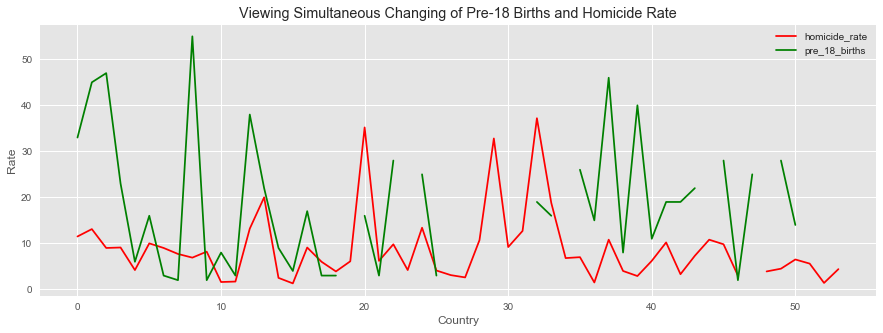

In [25]:
plt.figure(figsize=(15,5))
plt.plot(df['homicide_rate'], color = 'r')
plt.plot(df['pre_18_births'], color = 'g')
plt.title("Viewing Simultaneous Changing of Pre-18 Births and Homicide Rate")
plt.ylabel("Rate")
plt.xlabel("Country")
plt.legend()
plt.show()

As you can see, there are many cases where the red and green lines spike at the same time. What's more important to pay attention to is the extent to which the two lines move up or down together from one point on the x-axis (e.g. country) to the next, and to what extent the increase/decrease is of the same magnitude. While this graph reveals an obvious correlation, it also reveals the relative weakness of the correlation. At the beginning of the graph, for example, the homicide rates hover around the mean of ~9 while the pre-18 birth rates hover near their maximum. Clearly, pre-18 birth rate alone cannot adequately account for elevated homicide rates.

While different fields of study have different definitions, many social scientists would agree that any correlation coefficient below .3 is weak and any coefficient at or above .5 is moderately strong. Accepting this definition, there is only one moderately strong correlate of homicide rate. That being said, moderate correlations in between those two thresholds are still worth looking at and do portray valuable information.

Let's add the next strongest correlation to the picture: the percent of total income that the lowest 40% earn. Remember that this health indicator produced a positive result in the hypothesis test. While homicide rate and pre-18 birth rate tend to rise to together, homicide rate and 'lowest 40 income share' are negatively correlated. As the latter goes up, the former goes down. To better understand this, let's compare the correlations side by side and include a best fit regression line.

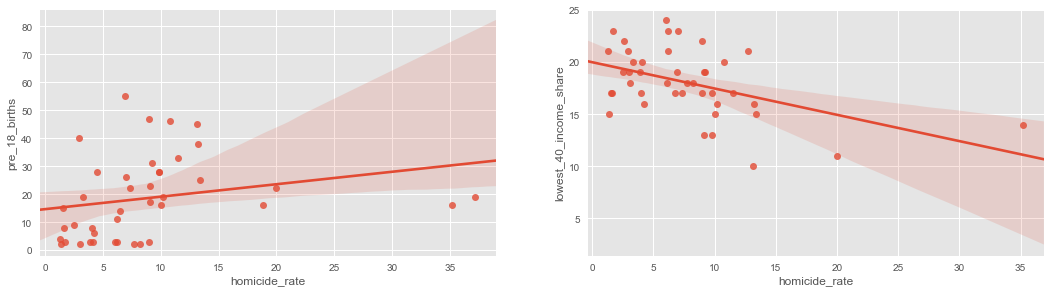

In [26]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.regplot(x = df['homicide_rate'], y = df['pre_18_births'])
plt.subplot(2,2,2)
sns.regplot(x = df['homicide_rate'], y = df['lowest_40_income_share'])
sns.plt.show()

Looking at the regression lines, one can see a moderately pleasing illustration of a trend in the data. On the other hand, both lines have points scattered very high above and below. Is there any way to combine these two factors to account for the variance in homicide rates? What about all the other health factors that have a Spearman's Rho greater than .3?

Answering these questions would require more advanced statistical techniques than were taught in Thinkful's Data Science Prep Course. Before proceeding to the conclusion section, I would like to answer question 3 as best as possible and then perform a tentative analysis that would be carried out properly with further research.

The health indicators that best account for the variance in homicide rate would be the ones with the strongest correlations, whether positive or negative. First, I will exclude all indicators with a Spearman's Rho of .3 or less. Then I will take the absolute value of Rho to get a value indicating strength, regardless of direction. Doing this and sorting them from strongest to weakest results in the following:

- pre_18_births = 0.507928
- suicide_rate = 0.468941
- lowest_40_income_share = 0.447992
- highest_20_income_share = 0.425937
- child_discipline = 0.369036
- poorest_children_in_bad_care = 0.327212
- adult_lit_rate = 0.305304

This is a rank ordering of the health indicators that best account for variance in homicide rate. But what about combining them together? I will now conduct a preliminary multivariate regression analysis using the ordinary least squares test. This test is used for prediction, so the results will constitute one answer to a slightly different question, namely: "Overall, which health indicators could best predict elevated homicide rate?"

Let's start with plugging in the top two correlations that were graphed earlier.

In [27]:
# uses ordinary least squares method with custom formula
result1 = smf.ols(formula="homicide_rate ~ pre_18_births + lowest_40_income_share", data=df).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          homicide_rate   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     6.401
Date:                Tue, 18 Jul 2017   Prob (F-statistic):            0.00437
Time:                        21:26:18   Log-Likelihood:                -113.77
No. Observations:                  37   AIC:                             233.5
Df Residuals:                      34   BIC:                             238.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 21

Although the F-statistic shows significance, we can see that the R-squared value is quite low at 0.274. This means that our model only accounts for 27.4% of the variance in homicide rate. This means that the regression isn't a good fit and our predictions won't be very accurate. One reason this may be the case is a regression analysis works best when the individual predictors are not highly correlated with one another. Ideally, each predictor will account for different variance in the dependent variable. Let's try a different measure of child maltreatment and compare results...

In [28]:
result = smf.ols(formula="homicide_rate ~ poorest_children_in_bad_care + lowest_40_income_share", data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          homicide_rate   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.13
Date:                Tue, 18 Jul 2017   Prob (F-statistic):           0.000277
Time:                        21:26:19   Log-Likelihood:                -81.217
No. Observations:                  31   AIC:                             168.4
Df Residuals:                      28   BIC:                             172.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

This model is already much better on many levels. The F-statistic is significant < 0.001 and the model accounts for 44.3% of the variance, almost twice as much. Nonetheless, the majority of the variance is not accounted for. I will not draw any conclusions from this test for this report. It does, however, show promise for future research.

# Part III: Conclusion

Having inspected the data, tested some assumptions, and conducted hypothesis tests, I can now draw final conclusions about the data. Before discussing the extent to which the three big analytic questions were answered, I will summarize the results of the hypothesis tests that answered the seven specific sub-questions. Recall that for each test, a significance value of p < 0.05 was required.

1) Do people living in more unequal countries kill each other more often?

- __H1: Null Hypothesis Rejected!__ Countries where the top 20% highest earning households have a higher share of total income _do indeed_ have significantly higher homicide rates.

- __H2: Null Hypothesis Rejected!__ Countries where the bottom 40% lowest earning households have a lower share of total income _do indeed_ have significantly higher homicide rates.

- _H3: Null Hypothesis maintained!_ Countries with a bigger gender gap in literacy rate do not have significantly higher homicide rates. 

2) Do countries with more pervasive child maltreatment suffer from higher homicide and suicide rates?

- _H4: Null Hypothesis Maintained!_ Countries with a higher proportion of poor children in inadequate care _do_ have significantly higher homicide rates.

- _H5: Null Hypothesis Maintained!_ Countries with a higher proportion of poor children in inadequate care do not have significantly higher suicide rates.

- __H6: Null Hypothesis Rejected!__ Countries with higher rates of violent child discipline _do indeed_ have significantly higher homicide rates.

- _H7: Null Hypothesis Maintained!_ Countries with higher rates of violent child discipline do not have significantly higher suicide rates.

As children, we all experienced the heated arguments with parents, siblings, and peers where one or more of us were yelling, "But that's not fair!" Experimental research shows that even our chimpanzee cousins have an innate sense of fairness and get angry when they participate in a task with an unfair outcome. This automatic and visceral feeling of outrage in the face of unfairness and inequality appears deeply rooted in human nature. Before this analysis, all I had was this belief and the intuition of a connection. Now that the data analysis has concluded, I can see that some of the available data does in fact reveal a connection between inequality and homicide rate that is so significant, it should not be ignored.

Since both H1 and H2 were accepted in favor of the null hypothesis while H3 was not, I can conclude that countries with higher levels of income inequality will likely have significantly higher homicide rates than more equal countries. The gender inequality manifested in the gender gap in literacy rate was perhaps a poor way to capture a country's total gender inequality. While many different measures of inequality and larger samples would be needed to confidently answer question 2 as a whole, I believe that one is wiser walking away from this analysis believing that countries with more profound economic inequality are populated by people who killer each other more often than to walk away assuming no connection. 

Countries with more widespread child maltreatment don't obviously have higher homicide rates and they definitely don't appear to have higher suicide rates than countries where child maltreatment is a fringe phenomena. Comparing H4 to H6 is interesting because both measure child maltreatment, just in different ways. Perhaps this data echoes what Martin Luther King Jr. meant when he said, "Violence begets violence." While I must refrain from making conclusions about causality, I can say that widespread violent child rearing practices come hand in hand with more widespread homicides. Another interesting comparison for question 2 is to compare our results for understanding homicide versus suicide. There were no significant findings to link health indicators to suicide rates. This was most likely due to the hypotheses I chose to formulate. Although it wasn't inspected here, the moderately strong positive correlation between suicide rate and recent heavy drinking episodes for males suggests that high suicide rates could be partly understood in terms of higher substance abuse rates. From a higher view, it is interesting to note that homicide and suicide rates do not seem to be explained by the same health indicators, at least in so far as the present analysis goes. 

## Proposal for Further Research

I am excited by the vast amount of additional analysis that could be done on this data set or similar ones. This could be done by others or by me if I continue on with Thinkful's full-blown Data Science bootcamp. I will organize the proposals into a few broad categories:

__Cleaner Data__

This data was difficult to handle because of the existence of null values. Furthermore, the health indicators were measured in different years. This casts serious shadows over possible conclusions because it is always possible that the countries being measured went through significant changes over the course of just a few years. For example, because the 'poorest children in bad care' indicator was only measured until 2011 while the homicide rates were measured in 2015, it is possible that some countries experienced massive economic hardship or regime change that resulted in very many more children in inadequate care for 2012 to 2015, which could have affected the homicide rates in 2015. Even more problematic is the difference between rate of heavy male drinking measured in 2010 and homicide and suicide rates measured in 2015. Perhaps certain countries experienced collective trauma in 2014, resulting in massive self-medication through substance abuse, further resulting in abnormally high suicide rates in 2015. This effect would not be captured in this data set because the heavy drinking was measured only in 2010. Further research can utilize effective data cleaning and data sourcing to solve these problems.

__More Indicators__

Further research should utilize a wider variety of health indicators that can capture new aspects of a county's inequality and child maltreatment. For example, some economists have developed a GINI index that is intended to represent the income and wealth distributions of countries. This is an example of an indicator that more fully captures total economic inequality. Moreover, further research could collect frequency statistics for child abuse, child malnourishment, and childhood trauma.

__More Advanced Statistical Techniques__

Further analysis of this data set should utilize a multivariate regression analysis to find the proper combination of health indicators that would best predict higher homicide rates. With cleaner data, more indicators, and a properly done regression analysis, an invaluable model could be produced to predict unacceptably high homicide rates. This could in turn be used to inform public policy and social attitudes towards the future dangers of inequality and child maltreatment.

If I were to enroll in Thinkful's full-blown Data Science bootcamp, I would revisit a clearer and more robust version of this data set and focus on prediction. I would ask, "Which countries will experience the largest increase in homicide rates over the next 10 years?" I would then create a predictive model by performing a multivariate regression analysis on data from 2005 to 2015. This model could then extrapolate into the future and make predictions for the largest increases in homicide rate from 2017 to 2027.